In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp

In [354]:
with open('results.json', 'r') as f:
    json_data = json.load(f)
json_data[0]

{'reaction_time': [279.5,
  353.30000000074506,
  343.90000000037253,
  1361.4000000003725,
  380.2000000011176,
  244.80000000074506,
  301.40000000037253,
  322,
  297.69999999925494,
  325,
  303.19999999925494,
  285.8999999985099,
  91.30000000074506,
  306.30000000074506,
  275.19999999925494],
 'emotion': 'sad',
 'survey': {'firstName': 'Lina',
  'age': '21',
  'moodBefore': '67',
  'sexe': 'Femme',
  'moodAfter': '55'},
 'id': '1'}

In [364]:
df = pd.DataFrame(columns=[])
big_rt_list = np.array([])
big_rt_list_clipped = np.array([])
emotion2 = []
emotion2_clipped = []
firstName, age, sexe, emotion,moodBefore, moodAfter, reaction_time, mean = [], [], [], [], [], [], [], []

for person in json_data:
    age_person = int(person["survey"]["age"])
    if age_person == 0:
        age_person = np.nan
    firstName.append(person["survey"]["firstName"])
    age.append(age_person)
    sexe.append(person["survey"]["sexe"])
    emotion.append(person["emotion"])

    # Conversion en coordonné
    before = int(person["survey"]["moodBefore"])
    after = int(person["survey"]["moodAfter"])
    
    moodBefore.append((before%10-0.5, 10 - before//10-0.5))
    moodAfter.append((after%10-0.5, 10 - after//10-0.5))
    # moodBefore.append(before)
    # moodAfter.append(after)
    
    #RT
    rt = np.array(person['reaction_time'])
    big_rt_list = np.concatenate((big_rt_list, rt), axis=None)
    [emotion2.append(person["emotion"]) for _ in range(len(rt))]

    #RT clip
    rt = rt[rt < 1000]
    rt = rt[rt > 200]
    reaction_time.append(rt)
    big_rt_list_clipped = np.concatenate((big_rt_list_clipped, rt), axis=None)
    [emotion2_clipped.append(person["emotion"]) for _ in range(len(rt))]
    mean.append(np.mean(rt))

    

long_df = pd.DataFrame({'emotion': emotion2, 'rt': big_rt_list})
long_df_clipped = pd.DataFrame({'emotion': emotion2_clipped, 'rt': big_rt_list_clipped})
df = pd.DataFrame({
    "firstName": firstName,
    "age": age,
    "sexe": sexe,
    "emotion": emotion,
    "moodBefore": moodBefore,
    "moodAfter": moodAfter,
    "rt": reaction_time,
    "mean" : mean
})
# df = df.drop(1)
df

,firstName,age,sexe,emotion,moodBefore,moodAfter,rt,mean
0,Lina,21.0,Femme,sad,67,55,"[279.5, 353.30000000074506, 343.90000000037253...",309.107692
1,Keroudine,NaN,Homme,neutral,78,69,"[606.0, 821.0, 718.0, 798.0, 745.0, 695.0, 576...",682.636364
2,Océane,21.0,Femme,sad,55,54,"[329.2000000476837, 288.2000000476837, 288.5, ...",290.980000
3,Agnes,23.0,Femme,neutral,35,84,"[386.7999999523163, 361.0, 365.7999999523163, ...",408.080000
4,Augustin,21.0,Homme,sad,32,52,"[344.0, 383.0, 370.0000000000582, 375.0, 412.0...",421.133333
5,Houssam,24.0,Homme,sad,67,66,"[408.80000001192093, 354.5, 351.5, 356.1999999...",370.713333
6,Kaëlig,20.0,Homme,sad,63,63,"[344.30000001192093, 352.80000001192093, 305.2...",383.064286
7,Emile,21.0,Homme,sad,67,54,"[411.0000000000291, 379.0, 340.9999999999709, ...",369.466667
8,Maeva,20.0,Femme,sad,77,53,"[328, 341, 311, 323, 422, 313, 299, 314, 337, ...",322.600000
9,Aksell,21.0,Femme,neutral,78,64,"[437, 374, 392, 364, 374, 360, 385, 393, 359, ...",383.200000


<AxesSubplot:ylabel='rt'>

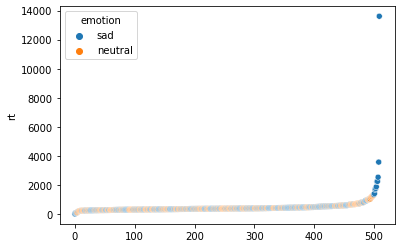

In [356]:
long_df = long_df.sort_values(by='rt')
sns.scatterplot(x=range(len(big_rt_list)), y=long_df['rt'], hue=long_df['emotion'])

<AxesSubplot:ylabel='rt'>

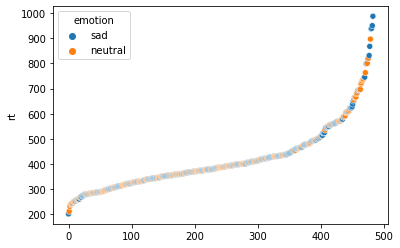

In [357]:
long_df_clipped = long_df_clipped.sort_values(by='rt')
sns.scatterplot(x=range(len(big_rt_list_clipped)), y=long_df_clipped['rt'], hue=long_df_clipped['emotion'])

<AxesSubplot:xlabel='emotion', ylabel='mean'>

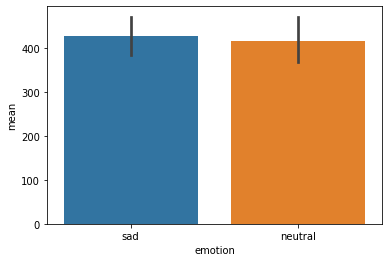

In [358]:
test = df[["emotion", "mean"]]
sns.barplot(x=df['emotion'], y=df['mean'])

In [359]:
sp.stats.ttest_ind(test[test["emotion"]=="sad"]["mean"], test[test["emotion"]!="sad"]["mean"])
# sp.stats.ks_2samp(test[test["emotion"]=="sad"]["mean"], test[test["emotion"]!="sad"]["mean"])

Ttest_indResult(statistic=0.2991959636133252, pvalue=0.766725164439129)

In [360]:
sp.stats.ttest_ind(long_df[long_df['emotion']=='sad']['rt'], long_df[long_df['emotion']!='sad']['rt'])

Ttest_indResult(statistic=1.5832522246819054, pvalue=0.11398631366592701)

# Vérification de l'induction émotionnelle

<AxesSubplot:>

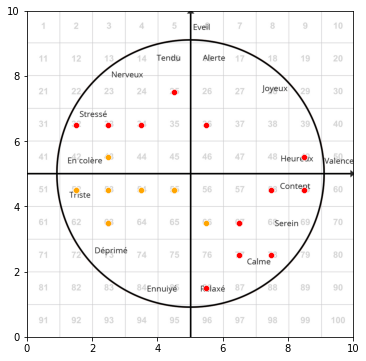

In [361]:
sad = df[df["emotion"]=="sad"].reset_index()
x_before_sad, y_before_sad = [], []
x_after_sad, y_after_sad = [], []

for i in range(len(sad)):
    x_before_sad.append(sad['moodBefore'][i][0])
    y_before_sad.append(sad['moodBefore'][i][1])
    x_after_sad.append(sad['moodAfter'][i][0])
    y_after_sad.append(sad['moodAfter'][i][1])

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
img = plt.imread('./figure_circumplex_model.png')
ax.imshow(img, extent=[0, 10, 0, 10])

sns.scatterplot(x=x_before_sad, y=y_before_sad, color='red')
sns.scatterplot(x=x_after_sad, y=y_after_sad, color='orange')

<AxesSubplot:>

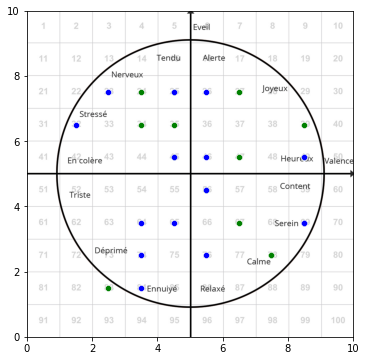

In [362]:
neutral = df[df["emotion"]!="sad"].reset_index()
x_before_neutral, y_before_neutral = [], []
x_after_neutral, y_after_neutral = [], []

for i in range(len(neutral)):
    x_before_neutral.append(neutral['moodBefore'][i][0])
    y_before_neutral.append(neutral['moodBefore'][i][1])
    x_after_neutral.append(neutral['moodAfter'][i][0])
    y_after_neutral.append(neutral['moodAfter'][i][1])

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
img = plt.imread('./figure_circumplex_model.png')
ax.imshow(img, extent=[0, 10, 0, 10])

sns.scatterplot(x=x_before_neutral, y=y_before_neutral, color='green')
sns.scatterplot(x=x_after_neutral, y=y_after_neutral, color='blue')

<AxesSubplot:xlabel='x', ylabel='y'>

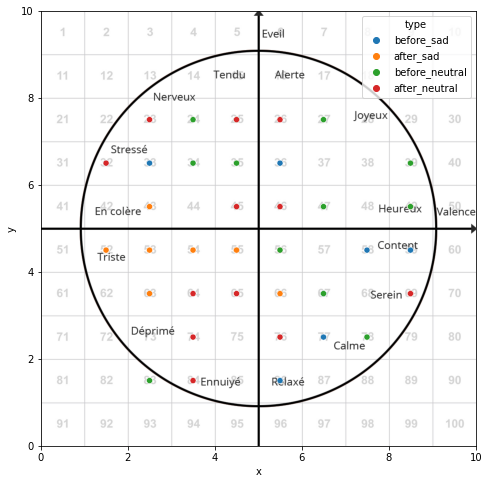

In [363]:
sad = df[df["emotion"]=="sad"].reset_index()
neutral = df[df["emotion"]!="sad"].reset_index()
tag = []
x,y = [],[]

for i in range(len(sad)):
    tag.append("before_sad")
    x.append(sad['moodBefore'][i][0])
    y.append(sad['moodBefore'][i][1])
    tag.append("after_sad")
    x.append(sad['moodAfter'][i][0])
    y.append(sad['moodAfter'][i][1])

for i in range(len(neutral)):
    tag.append("before_neutral")
    x.append(neutral['moodBefore'][i][0])
    y.append(neutral['moodBefore'][i][1])
    tag.append("after_neutral")
    x.append(neutral['moodAfter'][i][0])
    y.append(neutral['moodAfter'][i][1])

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
img = plt.imread('./figure_circumplex_model.png')
ax.imshow(img, extent=[0, 10, 0, 10])

test2 = pd.DataFrame({
    "type": tag,
    "x": x,
    "y": y,
})
sns.scatterplot(x='x', y='y', hue='type', data=test2)